In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [47]:
df = pd.read_csv('predictive_maintenance.csv')
print(df.head())
print("\n\n", df.isnull().sum())
print("\n\n", df.describe())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


 UDI                        0
Product ID                 0
Type                       0
Air

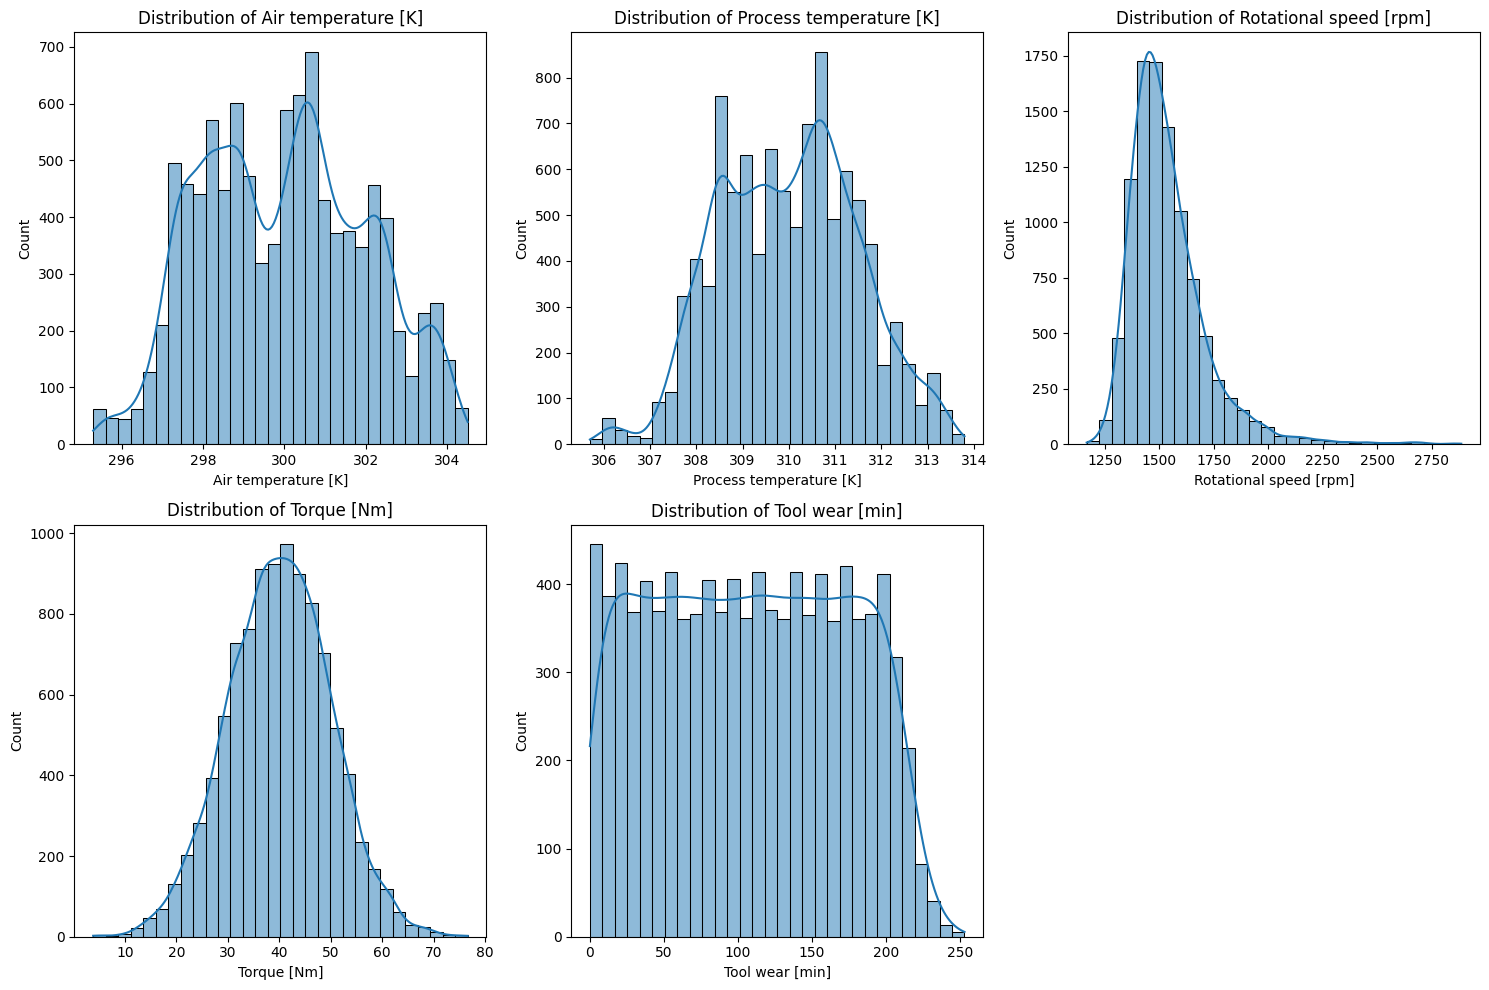

In [48]:
features_to_plot = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [49]:
target_distribution = df['Target'].value_counts(normalize=True)
target_distribution

Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64

In [50]:
df['Tool wear [min]'] = df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')

df.rename(mapper={'Air temperature [K]': 'Air_temperature',
                    'Process temperature [K]': 'Process_temperature',
                    'Rotational speed [rpm]': 'Rotational_speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool_wear'}, axis=1, inplace=True)

df

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,5,L47184,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604.0,29.5,14.0,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632.0,31.8,17.0,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645.0,33.4,22.0,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408.0,48.5,25.0,0,No Failure


In [51]:
X = df[['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [52]:
import xgboost as xgb

# Initialize the XGBoost classifier with specified hyperparameters
model_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Apply 4-Fold Cross Validation
cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=4, scoring='accuracy')

# Train the model on the training dataset
model_xgb.fit(X_train, y_train)

# Predict on the test dataset
y_pred = model_xgb.predict(X_test)

# Evaluate the model
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.9825 0.9785 0.976  0.9815]
Mean CV Accuracy: 0.9796250000000001
Accuracy on Test Set: 0.985
Confusion Matrix:
[[1925   10]
 [  20   45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1935
           1       0.82      0.69      0.75        65

    accuracy                           0.98      2000
   macro avg       0.90      0.84      0.87      2000
weighted avg       0.98      0.98      0.98      2000



In [53]:
score=accuracy_score(y_test,y_pred)
score

0.985

In [54]:
import pickle

In [57]:
with open('model_pickel', 'wb') as f:
    pickle.dump(model_xgb,f)

In [ ]:
with open('model_pickel', 'rb') as f:
    pred_model = pickle.load(f)